<a href="https://colab.research.google.com/github/barileao/SVM_Scania/blob/master/svm_scania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [3]:
!pip install pyod
!pip install impyute

     |████████████████████████████████| 92kB 3.3MB/s 
  Created wheel for pyod: filename=pyod-0.7.5-cp36-none-any.whl size=96597 sha256=b1ad8fdae6fd0bae68c6eb9859f9db8149259033798adf8838217633f04ae7cb
  Stored in directory: /root/.cache/pip/wheels/35/bc/f4/2cef321eac851ba02f533e3921b296bb4ce4998c8a4c9a8d6e
Successfully built pyod


# Imports

In [4]:
# importing all the necessary libraries
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,MissingIndicator
from sklearn.decomposition import TruncatedSVD
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,log_loss
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from datetime import datetime
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.feature_bagging import FeatureBagging
from fancyimpute import SoftImpute
from impyute.imputation.cs import mice



Using TensorFlow backend.


# Access data from drive

In [5]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


# Upload data


In [6]:
filetrain = r'/drive/My Drive/IFES/TCC_Scania/Codes/aps_failure_training_set.csv'
filetest = r'/drive/My Drive/IFES/TCC_Scania/Codes/aps_failure_test_set.csv'

train = pd.read_csv(filetrain)
print('Number of data points in the train dataset', train.shape[0])
print('Number of features in the given train dataset', train.shape[1])
test = pd.read_csv(filetest)
print('Number of data points in the test dataset', test.shape[0])
print('Number of features in the given test dataset', test.shape[1])

Number of data points in the train dataset 60000
Number of features in the given train dataset 171
Number of data points in the test dataset 16000
Number of features in the given test dataset 171


In [10]:
# Replacing all the class labels as follows:

# neg = 0
# pos = 1
class_labels_train = []
for x in tqdm(train.index):
    if train['class'].loc[x] == 'neg':
        class_labels_train.append(0)
        
    else:
        class_labels_train.append(1)
        

train['class'] = class_labels_train

# Distrubution of class labels in train dataset
train['class'].value_counts()



100%|██████████| 60000/60000 [00:02<00:00, 25125.88it/s]


# Histogram

Percentage of negative class in the given dataset : 98.33333333333333
Percentage of positive class in the given dataset : 1.6666666666666667


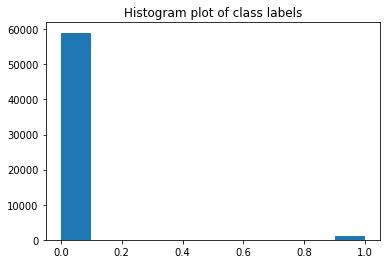

In [11]:
# Histogram plot of class labels of train dataset
plt.hist(train['class'])
plt.title("Histogram plot of class labels")
print("Percentage of negative class in the given dataset :", (train[train['class']== 0].shape[0] / train.shape[0]) * 100)
print("Percentage of positive class in the given dataset :", (train[train['class']== 1].shape[0] / train.shape[0]) * 100)


# Removing and replacing NAN and NA

In [0]:
y_train = train['class']
train.drop(['class'],axis = 1,inplace = True)

# Replacing the na and nan values with np.NaN
train.replace(to_replace='nan', value = np.NaN,inplace = True)

train.replace(to_replace = 'na', value = np.NaN, inplace = True)

columns_names = train.columns


